# AffectNet Validation Results

In [1]:
import pickle5 as pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

import matplotlib
font = {'size' : 16}

matplotlib.rc('font', **font)

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

pd.options.display.float_format = "{:,.2f}".format

## 1. Task-IL Results

In [2]:
%cd /Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/affectnet/validation

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/affectnet/validation


In [3]:
N_ITERATIONS = 2000
N_TASKS = 4
STRATEGIES = ["nr", "lr", "gr", "lgr", "grd", "lgrd"]
SEED = 1842

In [4]:
def get_val_data_for(replay_strategy): 
    file = open("val_affectnet_{}_{}.pkl".format(SEED, replay_strategy), 'rb')
    val = pickle.load(file)
    return val[0]

def get_train_data_for(replay_strategy): 
    file = open("val_affectnet_{}_{}.pkl".format(SEED, replay_strategy), 'rb')
    val = pickle.load(file)
    return val[1]

In [5]:
def get_final_accs(accs): 
    return list(map(lambda x: x[2], list(filter(lambda x: x[1] == N_ITERATIONS, accs))))

In [6]:
def arrange_by_tasks(accs):
    res = [[] for _ in range(N_TASKS)]
    for time in range(N_TASKS): 
        for task_number in range(time + 1):
            res[task_number].append(accs[time][task_number]) 
    return res 

In [7]:
def get_all_results(): 
    results = [dict() for _ in range(N_TASKS)]
    for replay_strategy in STRATEGIES: 
        data = get_final_accs(get_val_data_for(replay_strategy))
        data = arrange_by_tasks(data)
        for i in range(N_TASKS): 
            results[i][replay_strategy] = data[i]
    return results

### 1.1. Validation plot

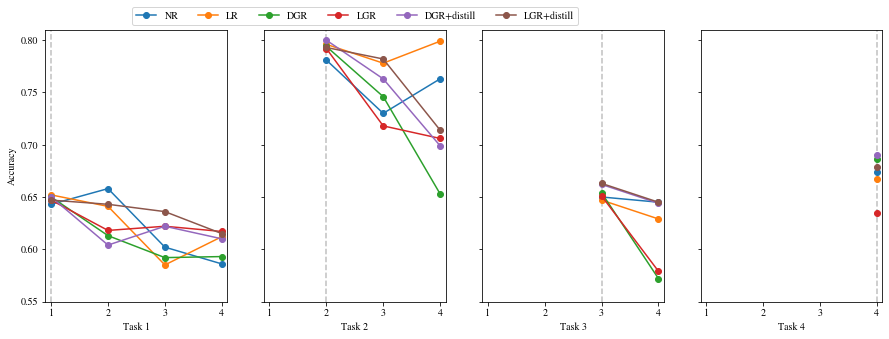

In [8]:
res = get_all_results()

EXPONENTIAL_SCALE = False
fig, ax = plt.subplots(1,N_TASKS,sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)


LABEL_MAPPING = {
    "nr": "NR", 
    "lr": "LR", 
    "gr": "DGR", 
    "lgr": "LGR", 
    "grd": "DGR+distill",
    "lgrd": "LGR+distill"
}

for task_number in range(N_TASKS): 
    results = res[task_number]
    ax[task_number].axvline(task_number+1, linestyle="--", c="grey", alpha=0.5)
    for strategy in results: 
        ax[task_number].plot(list(range(task_number + 1, N_TASKS + 1)), results[strategy], 
                                 "-o", label=LABEL_MAPPING[strategy])
    
    if EXPONENTIAL_SCALE: 
        exp = lambda x: 128000**(x)
        log = lambda x: np.log(x)
        ax[task_number].set_yscale('function', functions=(exp, log))
    if task_number == 0: 
        ax[task_number].legend(loc="lower left", bbox_to_anchor=(0.45, 1), ncol=len(LABEL_MAPPING))
        ax[task_number].set_ylabel("Accuracy")
    ax[task_number].set_ylim(0.55, 0.81)
    ax[task_number].set_xlabel("Task " + str(task_number + 1))
    ax[task_number].set_xlim(0.9, 4.1)
    ax[task_number].xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.savefig("/Users/samuilstoychev/Desktop/dissertation_figures/affectnet_taskil_val.svg")

### 1.2. Validation Results

In [9]:
rows = [] 

for replay_strategy in STRATEGIES: 
    val_results = get_final_accs(get_val_data_for(replay_strategy)) 
    train_results = get_final_accs(get_train_data_for(replay_strategy)) 
    
    val_accs = [] 
    train_accs = [] 
    for task_number in range(len(val_results)): 
        val_accs.append(val_results[task_number][task_number])
        train_accs.append(train_results[task_number][task_number]) 
        diffs = [train_accs[i] - val_accs[i] for i in range(len(val_accs))]
    rows.append([replay_strategy, "train"] + train_accs) 
    rows.append([replay_strategy, "val"] + val_accs)
    rows.append([replay_strategy, "discrepancy"] + diffs)

In [10]:
pd.DataFrame(rows, columns=["Replay method", "Accuracy"] + ["T" + str(i) for i in range(1, N_TASKS + 1)])

,Replay method,Accuracy,T1,T2,T3,T4
0,nr,train,0.67,0.81,0.67,0.70
1,nr,val,0.64,0.78,0.65,0.67
2,nr,discrepancy,0.02,0.03,0.02,0.02
3,lr,train,0.67,0.81,0.67,0.68
4,lr,val,0.65,0.80,0.65,0.67
5,lr,discrepancy,0.02,0.02,0.02,0.01
6,gr,train,0.67,0.81,0.69,0.70
7,gr,val,0.65,0.79,0.65,0.69
8,gr,discrepancy,0.02,0.01,0.03,0.01
9,lgr,train,0.67,0.80,0.68,0.65


## 2. Class-IL Results

In [11]:
%cd ~/Desktop/research_project_repo/research_project/experiments/affectnet_class/validation_class/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/affectnet_class/validation_class


In [12]:
N_ITERATIONS = 3000
N_TASKS = 8
STRATEGIES = ["nr", "lr", "gr", "lgr", "grd", "lgrd"]
SEED = 716

In [13]:
def get_val_data_for(replay_strategy): 
    file = open("val_affectnet_{}_{}.pkl".format(SEED, replay_strategy), 'rb')
    val = pickle.load(file)
    return val[0]

def get_train_data_for(replay_strategy): 
    file = open("val_affectnet_{}_{}.pkl".format(SEED, replay_strategy), 'rb')
    val = pickle.load(file)
    return val[1]

def get_final_accs(accs): 
    return list(map(lambda x: x[2], list(filter(lambda x: x[1] == N_ITERATIONS, accs))))

def arrange_by_tasks(accs):
    res = [[] for _ in range(N_TASKS)]
    for time in range(N_TASKS): 
        for task_number in range(time + 1):
            res[task_number].append(accs[time][task_number]) 
    return res 

def get_all_results(): 
    results = [dict() for _ in range(N_TASKS)]
    for replay_strategy in STRATEGIES: 
        data = get_final_accs(get_val_data_for(replay_strategy))
        data = arrange_by_tasks(data)
        
        for i in range(N_TASKS): 
            results[i][replay_strategy] = data[i]
    return results

### 2.1. Validation plot

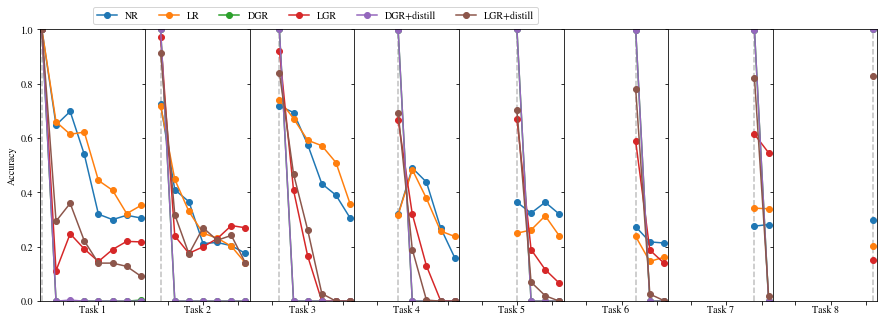

In [14]:
res = get_all_results()

EXPONENTIAL_SCALE = False
fig, ax = plt.subplots(1,N_TASKS,sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)

LABEL_MAPPING = {
    "nr": "NR", 
    "lr": "LR", 
    "gr": "DGR", 
    "lgr": "LGR", 
    "grd": "DGR+distill",
    "lgrd": "LGR+distill"
}

for task_number in range(N_TASKS): 
    ax[task_number].axvline(task_number+1, linestyle="--", c="grey", alpha=0.5)
    results = res[task_number]
    for strategy in results: 
        ax[task_number].plot(list(range(task_number + 1, N_TASKS + 1)), results[strategy], 
                                 "-o", label=LABEL_MAPPING[strategy])
    
    if EXPONENTIAL_SCALE: 
        exp = lambda x: 128000**(x)
        log = lambda x: np.log(x)
        ax[task_number].set_yscale('function', functions=(exp, log))
    if task_number == 0: 
        ax[task_number].legend(loc="lower left", bbox_to_anchor=(0.45, 1), ncol=len(LABEL_MAPPING))
        ax[task_number].set_ylabel("Accuracy")
    ax[task_number].set_ylim(0.0, 1)
    ax[task_number].set_xlabel("Task " + str(task_number + 1))
    ax[task_number].set_xlim(0.9, 8.3)
    ax[task_number].tick_params(axis='x', labelbottom=False) 
#     ax[task_number].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig("/Users/samuilstoychev/Desktop/dissertation_figures/affectnet_classil_val.svg")

### 2.2. Validation table

In [15]:
rows = [] 

for replay_strategy in STRATEGIES: 
    val_results = get_final_accs(get_val_data_for(replay_strategy)) 
    train_results = get_final_accs(get_train_data_for(replay_strategy)) 
    
    val_accs = [] 
    train_accs = [] 
    for task_number in range(len(val_results)): 
        val_accs.append(val_results[task_number][task_number])
        train_accs.append(train_results[task_number][task_number]) 
        diffs = [train_accs[i] - val_accs[i] for i in range(len(val_accs))]
    rows.append([replay_strategy, "train"] + train_accs) 
    rows.append([replay_strategy, "val"] + val_accs)
    rows.append([replay_strategy, "discrepancy"] + diffs)

In [16]:
pd.DataFrame(rows, columns=["Replay method", "Accuracy"] + ["T" + str(i) for i in range(1, N_TASKS + 1)])

,Replay method,Accuracy,T1,T2,T3,T4,T5,T6,T7,T8
0,nr,train,1.00,0.78,0.71,0.33,0.45,0.30,0.30,0.29
1,nr,val,1.00,0.72,0.72,0.32,0.36,0.27,0.28,0.30
2,nr,discrepancy,0.00,0.06,-0.01,0.01,0.08,0.02,0.02,-0.01
3,lr,train,1.00,0.76,0.76,0.35,0.29,0.24,0.35,0.21
4,lr,val,1.00,0.72,0.74,0.32,0.25,0.24,0.34,0.20
5,lr,discrepancy,0.00,0.04,0.02,0.03,0.04,-0.00,0.01,0.00
6,gr,train,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
7,gr,val,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
8,gr,discrepancy,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
9,lgr,train,1.00,0.99,0.92,0.69,0.68,0.59,0.64,0.17
